In [30]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
from collections import OrderedDict
layers = OrderedDict([('full1', nn.laye

In [24]:
class Mlp2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Mlp2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.zeros_(self.fc1.bias)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.zeros_(self.fc2.bias)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

In [19]:
net = Mlp2(2,2,2)

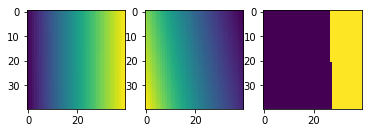

In [84]:

r = np.arange(-1,1,0.05)
res = np.zeros((len(r), len(r),2), np.double)
for i,x1 in enumerate(r):
    for j,x2 in enumerate(r):
        res[i,j,:] = net(torch.FloatTensor([x1,x2])).detach().numpy()
        

plt.subplots(1,3)
plt.subplot(1,3,1)
plt.imshow(res[:,:,0])
plt.subplot(1,3,2)
plt.imshow(res[:,:,1])
plt.subplot(1,3,3)
plt.imshow(res[:,:,1] < res[:,:,0])

In [76]:
res[:,:,0].min(), res[:,:,1].min(), res[:,:,0].max(), res[:,:,1].max(), 

(0.03485667705535889,
 1.0705223083496094,
 0.5005490183830261,
 1.2664577960968018)

In [81]:
net.fc2.bias= torch.nn.Parameter(torch.FloatTensor([0, 0.657]))

In [83]:
print('{:.2f}'.format(5))

print(', '.join(['{:.2f}'.format(x) for x in res[20,:,1]]))


5.00
1.25, 1.24, 1.24, 1.23, 1.23, 1.22, 1.22, 1.21, 1.21, 1.20, 1.20, 1.19, 1.19, 1.18, 1.18, 1.17, 1.17, 1.16, 1.16, 1.15, 1.15, 1.15, 1.14, 1.14, 1.13, 1.13, 1.13, 1.12, 1.12, 1.11, 1.11, 1.11, 1.10, 1.10, 1.10, 1.09, 1.09, 1.09, 1.08, 1.08


In [59]:
print(res[:,:,0].min())
print(res[:,:,1].max())

0.6474246382713318
-0.55169677734375


In [60]:
torch.nn.init.__dict__

{'__name__': 'torch.nn.init',
 '__doc__': None,
 '__package__': 'torch.nn',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7f696f00db70>,
 '__spec__': ModuleSpec(name='torch.nn.init', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f696f00db70>, origin='/usr/local/anaconda3/lib/python3.7/site-packages/torch/nn/init.py'),
 '__file__': '/usr/local/anaconda3/lib/python3.7/site-packages/torch/nn/init.py',
 '__cached__': '/usr/local/anaconda3/lib/python3.7/site-packages/torch/nn/__pycache__/init.cpython-37.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__>,
  'abs': <

In [87]:

a=np.array([1,2,4])
np.diff(a)

array([1, 2])

In [22]:
x2 = Variable(torch.FloatTensor([1,0]))
net(x)

tensor([ 0.9052, -0.6532], grad_fn=<AddBackward0>)

In [ ]:
def train:
    for epoch in range(num_epochs):
        for i, (train_x, train_y) in enumerate(train_data)